
# Importing Dependencies

In [1]:
import tensorflow as tf
import os

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
len(gpus)

0

In [4]:
import cv2
import imghdr

In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [6]:
data_dir ="/content/drive/My Drive/DeepLearning/data"

In [7]:
path = os.listdir(data_dir)
path.remove('.DS_Store')
path

['sad', 'happy']

In [8]:
image_exts = ['jpeg, jpg, bmp, png']

## Remove dodgy images and images with invalid exentions

In [9]:
for image_class in path:
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print("Image not in ext list {}".format(image_path))
        os.remove(image_path)
    except Exception as e:
      print("Issue with image {}".format(image_path))


Image not in ext list /content/drive/My Drive/DeepLearning/data/sad/images5.jpg
Image not in ext list /content/drive/My Drive/DeepLearning/data/sad/image11.jpeg
Image not in ext list /content/drive/My Drive/DeepLearning/data/sad/images24.jpg
Image not in ext list /content/drive/My Drive/DeepLearning/data/sad/1000_F_58495935_Nr9VzQljLyN3RKKhGDGxQDBEkqIeLzrZ.jpg
Image not in ext list /content/drive/My Drive/DeepLearning/data/sad/sad-people-vector-26812552.jpg
Image not in ext list /content/drive/My Drive/DeepLearning/data/sad/image22.jpeg
Image not in ext list /content/drive/My Drive/DeepLearning/data/sad/images7.jpg
Image not in ext list /content/drive/My Drive/DeepLearning/data/sad/Make-someone-sad-happy.jpg
Image not in ext list /content/drive/My Drive/DeepLearning/data/sad/image10.jpeg
Image not in ext list /content/drive/My Drive/DeepLearning/data/sad/image30.png
Image not in ext list /content/drive/My Drive/DeepLearning/data/sad/images9.jpg
Image not in ext list /content/drive/My D

# Load Data

In [10]:
tf.data.Dataset??

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
tf.keras.utils.imgage_dataset_from_directory??

Object `tf.keras.utils.imgage_dataset_from_directory` not found.


In [14]:
data = tf.keras.utils.image_dataset_from_directory("/content/drive/My Drive/DeepLearning/data")

Found 246 files belonging to 2 classes.


In [15]:
data_iterator = data.as_numpy_iterator()

In [16]:
#get a batch from the iterator
batch = data_iterator.next()

In [17]:
#images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [18]:
#class 1 = sad ppl
#class 2 = happy ppl
batch[1] #labels

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1], dtype=int32)

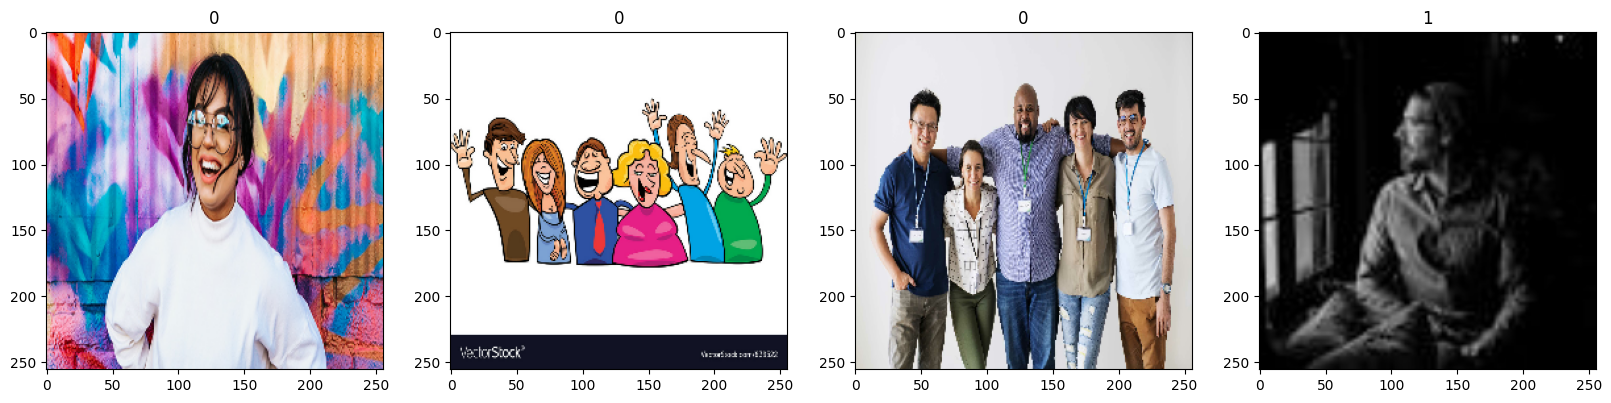

In [19]:


fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

# Preprocessing data

### scale the data

In [20]:
data = data.map(lambda x,y: (x/255, y)) #x is images, y is target variable

In [21]:
scaled_iterator = data.as_numpy_iterator()

In [22]:
batch = scaled_iterator.next()

In [23]:
batch[0].min()
batch[0].max()

1.0

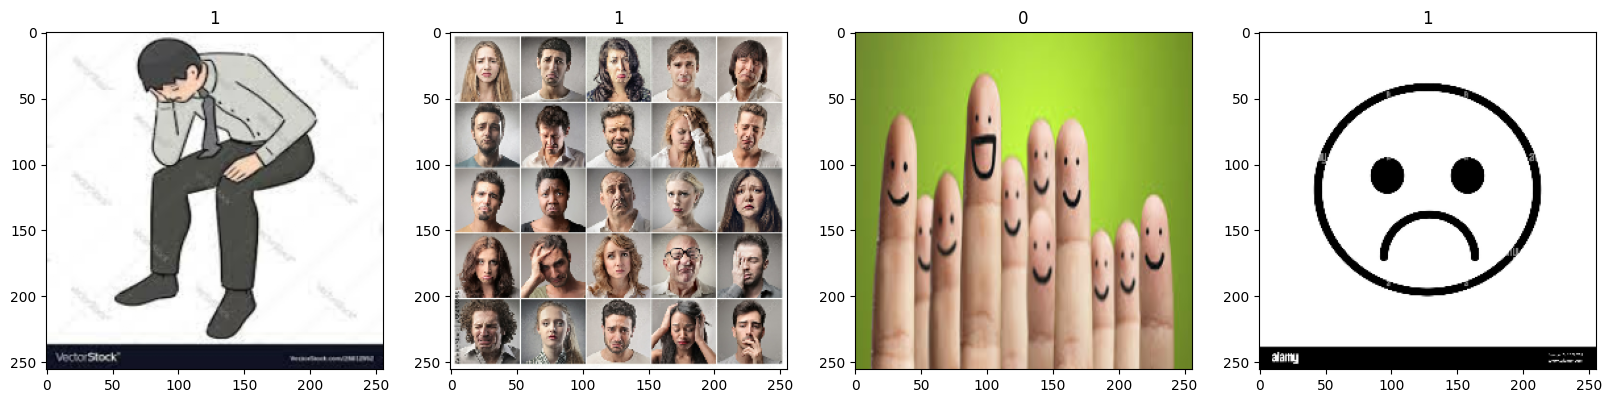

In [24]:
fig, ax = plt.subplots(ncols=4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

In [25]:
len(data)

8

In [26]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2) + 1
test_size = int(len(data)*0.1) + 1

In [27]:
train_size+val_size+test_size

8

In [28]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Deep Model

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [31]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation = "relu", input_shape = (256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation = "relu"))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation = "relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile("adam", loss=tf.losses.BinaryCrossentropy(), metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [35]:
logdir = 'logs'

In [36]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [37]:
hist = model.fit(train, epochs = 20, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/20
5/5 [==============================] - 27s 5s/step - loss: 0.7795 - accuracy: 0.4938 - val_loss: 0.6636 - val_accuracy: 0.5156
Epoch 2/20
5/5 [==============================] - 20s 3s/step - loss: 0.6756 - accuracy: 0.5437 - val_loss: 0.7129 - val_accuracy: 0.5781
Epoch 3/20
5/5 [==============================] - 22s 4s/step - loss: 0.6861 - accuracy: 0.6313 - val_loss: 0.6478 - val_accuracy: 0.7656
Epoch 4/20
5/5 [==============================] - 19s 3s/step - loss: 0.6498 - accuracy: 0.6938 - val_loss: 0.5918 - val_accuracy: 0.7656
Epoch 5/20
5/5 [==============================] - 19s 3s/step - loss: 0.5653 - accuracy: 0.7563 - val_loss: 0.4907 - val_accuracy: 0.8594
Epoch 6/20
5/5 [==============================] - 23s 4s/step - loss: 0.4378 - accuracy: 0.8062 - val_loss: 0.4096 - val_accuracy: 0.7812
Epoch 7/20
5/5 [==============================] - 19s 4s/step - loss: 0.4444 - accuracy: 0.8188 - val_loss: 0.4650 - val_accuracy: 0.7188
Epoch 8/20
5/5 [==================

In [38]:
hist.history

{'loss': [0.7794688940048218,
  0.6756083369255066,
  0.6860519051551819,
  0.6497759222984314,
  0.5653124451637268,
  0.4378494620323181,
  0.44444531202316284,
  0.3331635594367981,
  0.24835333228111267,
  0.18361160159111023,
  0.20576584339141846,
  0.17732830345630646,
  0.11585026979446411,
  0.08745268732309341,
  0.0466613695025444,
  0.0532994382083416,
  0.02410934679210186,
  0.024822965264320374,
  0.03635858744382858,
  0.022369397804141045],
 'accuracy': [0.4937500059604645,
  0.543749988079071,
  0.6312500238418579,
  0.6937500238418579,
  0.7562500238418579,
  0.8062499761581421,
  0.8187500238418579,
  0.8812500238418579,
  0.90625,
  0.949999988079071,
  0.90625,
  0.9375,
  0.9750000238418579,
  0.981249988079071,
  1.0,
  0.987500011920929,
  0.9937499761581421,
  1.0,
  0.987500011920929,
  1.0],
 'val_loss': [0.6635727882385254,
  0.7128932476043701,
  0.6478116512298584,
  0.5917568206787109,
  0.49071890115737915,
  0.4095754027366638,
  0.4649793803691864,
  

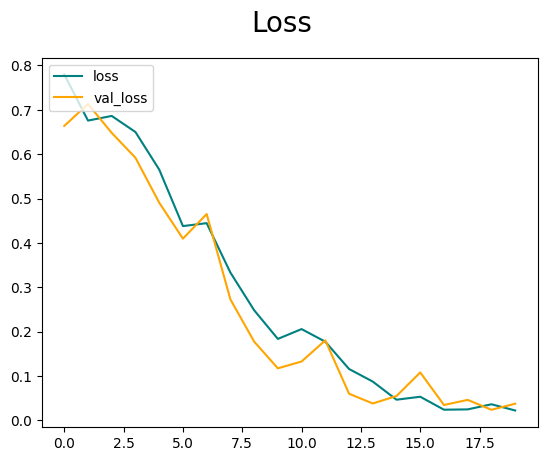

In [39]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig. suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

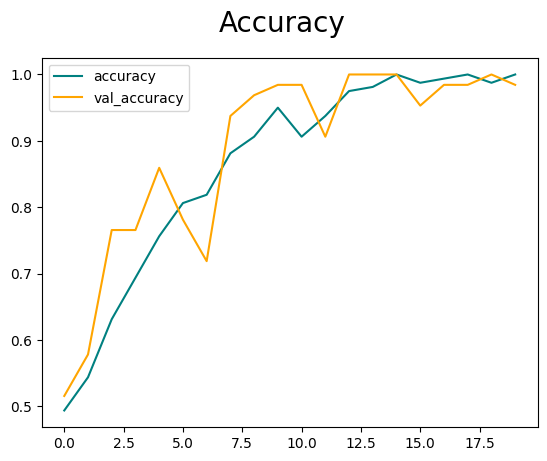

In [40]:
fig = plt.figure()
plt. plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label= 'val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend (loc="upper left")
plt.show()

# Evaluate Performance

In [41]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [42]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [43]:
len(test)

1

In [46]:
for batch in test.as_numpy_iterator():
  X,y = batch
  yhat = model.predict(X)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

1/1 [==============================] - 0s 356ms/step


In [47]:
print(f"Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}")

Precision: 1.0, Recall: 1.0, Accuracy: 1.0


# Test

In [48]:
import cv2

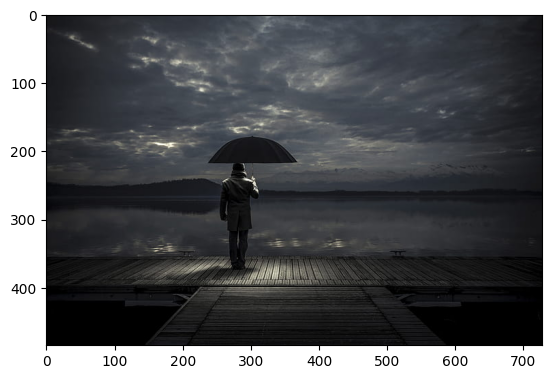

In [69]:
img = cv2.imread("/content/drive/My Drive/DeepLearning/sadperson.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

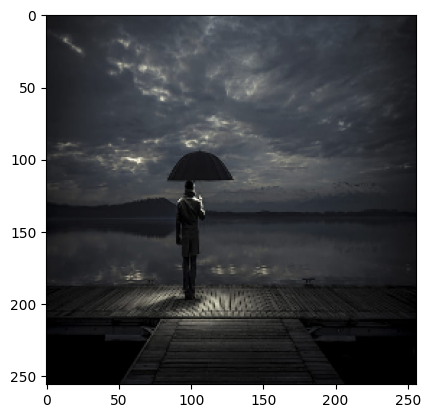

In [70]:
resize = tf.image.resize(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [64]:
resize.shape

TensorShape([256, 256, 3])

In [65]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [71]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 60ms/step


array([[0.99104804]], dtype=float32)

In [72]:
if yhat > 0.5:
  print("Predicted class is 'Sad'")
else:
  print("Predicted class is 'Happy'")

Predicted class is 'Sad'


# Save the Model

In [74]:
from tensorflow.keras.models import load_model

In [79]:
#serialization
model.save(os.path.join('/content/drive/My Drive/DeepLearning/models', 'happysadmodel.h5'))

In [80]:
new_model = load_model(os.path.join('models', 'happysadmodel.h5'))

In [81]:
new_model

In [82]:
yhat_new = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 172ms/step


In [83]:
if yhat_new > 0.5:
  print("Predicted class is 'Sad'")
else:
  print("Predicted class is 'Happy'")

Predicted class is 'Sad'
